In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [2]:
# import data
data = pd.read_csv('hcp_drug_prediction_data_cleaned.csv')
print(data)

      Subject  PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  \
0      100004           8         112.44            88.64          111.01   
1      100206           6         118.78           104.94          116.55   
2      100307           4         103.45           109.92          101.90   
3      100408           4         125.19           100.77          113.51   
4      100610           4         101.69           115.18          114.18   
5      101006           2          70.00            94.30           92.33   
6      101107           9          97.37           105.69           96.19   
7      101208           6          95.64            82.44           84.46   
8      101309           5          93.36            86.03          103.37   
9      101410           8         111.31           106.84          100.58   
10     101612           4         101.54            96.84          108.32   
11     101915           6          84.96            90.94           89.10   

In [3]:
data["Age_recoded"] = data["Age_recoded"].astype('category')
data["Gender_recoded"] = data["Gender_recoded"].astype('category')
data["sub_use"] = data["sub_use"].astype('category')

In [4]:
print(data.shape)

(1169, 75)


In [5]:
print(data.dtypes)

Subject                 int64
PSQI_Score              int64
PicSeq_AgeAdj         float64
CardSort_AgeAdj       float64
Flanker_AgeAdj        float64
PMAT24_A_CR           float64
PMAT24_A_SI           float64
PMAT24_A_RTCR         float64
ReadEng_AgeAdj        float64
PicVocab_AgeAdj       float64
ProcSpeed_AgeAdj      float64
DDisc_SV_1mo_200      float64
DDisc_SV_6mo_200      float64
DDisc_SV_1yr_200      float64
DDisc_SV_3yr_200      float64
DDisc_SV_5yr_200      float64
DDisc_SV_10yr_200     float64
DDisc_SV_1mo_40K      float64
DDisc_SV_6mo_40K      float64
DDisc_SV_1yr_40K      float64
DDisc_SV_3yr_40K      float64
DDisc_SV_5yr_40K      float64
DDisc_SV_10yr_40K     float64
DDisc_AUC_200         float64
DDisc_AUC_40K         float64
VSPLOT_TC             float64
VSPLOT_CRTE           float64
VSPLOT_OFF            float64
SCPT_TP               float64
SCPT_TN               float64
                       ...   
ER40ANG               float64
ER40FEAR              float64
ER40HAP   

In [6]:
#array = dataframe.values
X = data.drop(['Subject','sub_use'], axis = 1)
y = data.loc[:,'sub_use']

In [7]:
print(X.shape)
print(X.iloc[:,0:71])

(1169, 73)
      PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  PMAT24_A_CR  \
0              8         112.44            88.64          111.01         19.0   
1              6         118.78           104.94          116.55         20.0   
2              4         103.45           109.92          101.90         17.0   
3              4         125.19           100.77          113.51          7.0   
4              4         101.69           115.18          114.18         23.0   
5              2          70.00            94.30           92.33         11.0   
6              9          97.37           105.69           96.19         14.0   
7              6          95.64            82.44           84.46          8.0   
8              5          93.36            86.03          103.37         15.0   
9              8         111.31           106.84          100.58         19.0   
10             4         101.54            96.84          108.32         19.0   
11             6 

In [8]:
# pull out continuous vars
X_con = X.iloc[:,0:71]

# standardize continuous vars
scaler = StandardScaler()
X.iloc[:,0:71] = scaler.fit_transform(X_con)

In [9]:
print(X)

      PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  PMAT24_A_CR  \
0       1.119884       0.457481        -1.313371        0.952953     0.474977   
1       0.408586       0.834918         0.303455        1.501609     0.679038   
2      -0.302713      -0.077716         0.797429        0.050741     0.066856   
3      -0.302713       1.216521        -0.110175        1.200542    -1.973748   
4      -0.302713      -0.182493         1.319178        1.266895     1.291219   
5      -1.014011      -2.069080        -0.751945       -0.897027    -1.157506   
6       1.475534      -0.439674         0.377848       -0.514751    -0.545325   
7       0.408586      -0.542665        -1.928359       -1.676436    -1.769688   
8       0.052937      -0.678399        -1.572261        0.196323    -0.341264   
9       1.119884       0.390210         0.491919       -0.079986     0.474977   
10     -0.302713      -0.191423        -0.499998        0.686548     0.474977   
11      0.408586      -1.178

In [10]:
print(X_con)

      PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  PMAT24_A_CR  \
0              8         112.44            88.64          111.01         19.0   
1              6         118.78           104.94          116.55         20.0   
2              4         103.45           109.92          101.90         17.0   
3              4         125.19           100.77          113.51          7.0   
4              4         101.69           115.18          114.18         23.0   
5              2          70.00            94.30           92.33         11.0   
6              9          97.37           105.69           96.19         14.0   
7              6          95.64            82.44           84.46          8.0   
8              5          93.36            86.03          103.37         15.0   
9              8         111.31           106.84          100.58         19.0   
10             4         101.54            96.84          108.32         19.0   
11             6          84

C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

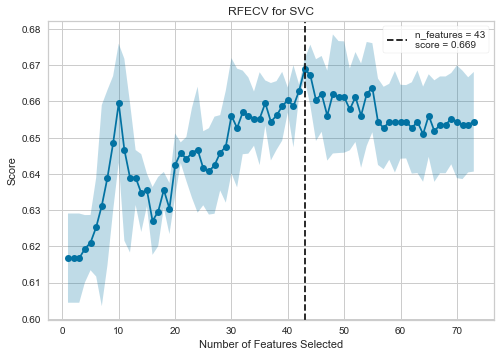

In [12]:
#from yellowbrick.features import RFECV
# feature extraction
'''model = LogisticRegression()

# The "accuracy" scoring is proportional to the number of correct classifications
# cv default is 3-fold
rfecv = RFECV(estimator=model,step=1,scoring='accuracy') 
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()'''
#conda install -c districtdatalabs yellowbrick


from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.features import RFECV



# Create RFECV visualizer with linear SVM classifier
viz = RFECV(SVC(kernel='linear', C=1, class_weight='balanced'))
viz.fit(X, y)
viz.poof()



In [40]:
from sklearn.feature_selection import RFE

est=RFE(SVC(kernel='linear', C=1, class_weight='balanced'), 10)
est.fit(X,y)
 
est2 = RFE(SVC(kernel='linear', C=1, class_weight='balanced'), 10)
est2.fit(X,y)  



False

In [43]:
inds = est.get_support()
inds2 = est2.get_support()
AAA = X.columns[inds]
BBB = X.columns[inds2]
print(AAA)
print(BBB)

Index(['CardSort_AgeAdj', 'DDisc_SV_1yr_200', 'DDisc_SV_1yr_40K', 'VSPLOT_OFF',
       'CogEarlyComp_AgeAdj', 'AngAggr_Unadj', 'FearSomat_Unadj',
       'SelfEff_Unadj', 'NEOFAC_C', 'Gender_recoded'],
      dtype='object')
Index(['CardSort_AgeAdj', 'DDisc_SV_1yr_200', 'DDisc_SV_1yr_40K', 'VSPLOT_OFF',
       'CogEarlyComp_AgeAdj', 'AngAggr_Unadj', 'FearSomat_Unadj',
       'SelfEff_Unadj', 'NEOFAC_C', 'Gender_recoded'],
      dtype='object')


In [37]:
# It seems like Gender is a predictor of drug use; Let's proceed with the analysis separating the genders.







SyntaxError: invalid syntax (<ipython-input-37-e29285946c58>, line 4)